In [3]:
#Library used in the work
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn.decomposition import PCA

In [4]:
articles = pd.read_csv("phpgBMvy4.csv",header=0)
articles.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,'http://mashable.com/2013/01/07/amazon-instant...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,'http://mashable.com/2013/01/07/ap-samsung-spo...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,'http://mashable.com/2013/01/07/apple-40-billi...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,'http://mashable.com/2013/01/07/astronaut-notr...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,'http://mashable.com/2013/01/07/att-u-verse-ap...,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
#Only keep relevant variables
categorials_names = list({"data_channel_isarticlesfestyle","data_channel_is_entertainment","data_channel_is_bus","data_channel_is_socmed",
                    "data_channel_is_tech","data_channel_is_world","weekday_is_monday","weekday_is_monday","weekday_is_tuesday",
                     "weekday_is_wednesday","weekday_is_thursday","weekday_is_friday","weekday_is_saturday","weekday_is_sunday",
                    "is_weekend"})

numericals_names = list({"timedelta","n_tokens_title","n_tokens_content","n_unique_tokens","n_non_stop_words",
                    "n_non_stop_unique_tokens","num_hrefs","num_self_hrefs","num_imgs","num_videos","average_token_length",
                   "num_keywords","kw_min_min","kw_max_min","kw_avg_min","kw_min_max","kw_max_max","kw_avg_max","kw_min_avg",
                    "kw_max_avg","kw_avg_avg","self_reference_min_shares","self_reference_max_shares","self_reference_avg_sharess",
                   "LDA_00","LDA_01","LDA_02","LDA_03","LDA_04","global_subjectivity","global_sentiment_polarity","global_rate_positive_words"
                    ,"global_rate_negative_words","rate_positive_words","rate_negative_words","avg_positive_polarity","min_positive_polarity",
                    "max_positive_polarity","avg_negative_polarity","min_negative_polarity","max_negative_polarity","title_subjectivity",
                    "title_sentiment_polarity","abs_title_subjectivity","abs_title_sentiment_polarity","shares"})

print("{cat} categorials variables, {num} numericals variables and {tot} variables in totals".format(cat = len(categorials_names),num=len(numericals_names)
                                                                                                  ,tot=len(categorials_names)+len(numericals_names)
                                                                                                 ))

14 categorials variables, 46 numericals variables and 60 variables in totals


In [7]:
#Select some variables for comparison
var_list = ["n_tokens_title","n_tokens_content","n_unique_tokens"]
models_var_list = ["constant"]
models_var_list.extend(var_list)
X = articles.loc[:,var_list]
Y = articles["shares"]

# Comparison for OLS

## Our Implementation

In [8]:
class Ols:
    def __init__(self,fit_intercept=True):
        """
        Instance of Ordinary least square regression
        """
        self.coefs=[]
        self.fit_intercept=fit_intercept

    def fit(self,X,Y):
        """

        """
        X=np.array(X)
        if self.fit_intercept :
            X = np.concatenate(
                (
                np.ones(X.shape[0]).reshape((X.shape[0],-1)),
                 X
                ),axis=1) 
        Y = np.array(Y)
        self.coefs = np.linalg.inv(X.T@X)@X.T@Y
        self.residuals = Y-X@self.coefs
        self.stds = np.sqrt(np.diag(np.var(self.residuals)*(np.linalg.inv(X.T@X))))
        self.students = self.coefs/self.stds
        self.R2 = 1 - np.sum(self.residuals**2)/np.sum((Y-np.mean(Y))**2)
        return self

In [9]:
ols_own = Ols().fit(X,Y)

In [10]:
ols_own.stds

array([2.99898913e+02, 2.76263850e+01, 1.23969631e-01, 1.65859292e+01])

In [11]:
ols_own.students

array([9.54502937, 1.74113383, 0.45873389, 0.17198693])

In [12]:
ols_own.R2

8.317862280315946e-05

## comparison

In [13]:
sk_ols= linear_model.LinearRegression(fit_intercept=True).fit(X,Y)
sk_ols_coefs = [sk_ols.intercept_]
sk_ols_coefs.extend(sk_ols.coef_)

In [14]:
compare_ols = pd.DataFrame({
    "var":models_var_list,
    "coefs":np.round(ols_own.coefs,3),
    "skit-learn": np.round(sk_ols_coefs,3) })
compare_ols

,var,coefs,skit-learn
0,constant,2862.544,2862.544
1,n_tokens_title,48.101,48.101
2,n_tokens_content,0.057,0.057
3,n_unique_tokens,2.853,2.853


In [15]:
#Import to latex
compare_ols.to_latex(index=False)

'\\begin{tabular}{lrr}\n\\toprule\n              var &     coefs &  skit-learn \\\\\n\\midrule\n         constant &  2862.544 &    2862.544 \\\\\n   n\\_tokens\\_title &    48.101 &      48.101 \\\\\n n\\_tokens\\_content &     0.057 &       0.057 \\\\\n  n\\_unique\\_tokens &     2.853 &       2.853 \\\\\n\\bottomrule\n\\end{tabular}\n'

# Comparison for ridge

## Our Implementation

In [16]:
class Ridge:
    def __init__(self,penalization=1,fit_intercept=True):
        self.penalization = penalization
        self.fit_intercept=fit_intercept
        
    def fit(self,X,Y):
        X=np.array(X)
        if self.fit_intercept :
            X = np.concatenate(
                (
                np.ones(X.shape[0]).reshape((X.shape[0],-1)),
                 X
                ),axis=1) 
        Y = np.array(Y)
        self.coefs = np.linalg.inv(X.T@X + self.penalization*np.identity(X.shape[1]))@X.T@Y
        return self


In [17]:
own_ridge = Ridge().fit(X,Y)

In [18]:
sk_ridge = linear_model.Ridge().fit(X,Y)
sk_ridge_coefs = [sk_ols.intercept_]
sk_ridge_coefs.extend(sk_ols.coef_)

In [19]:
#Import to latex
compare_ols.to_latex(index=False)

'\\begin{tabular}{lrr}\n\\toprule\n              var &     coefs &  skit-learn \\\\\n\\midrule\n         constant &  2862.544 &    2862.544 \\\\\n   n\\_tokens\\_title &    48.101 &      48.101 \\\\\n n\\_tokens\\_content &     0.057 &       0.057 \\\\\n  n\\_unique\\_tokens &     2.853 &       2.853 \\\\\n\\bottomrule\n\\end{tabular}\n'

# Comparison

In [20]:
compare_ridge = pd.DataFrame({
    "var":models_var_list,
    "coefs":np.round(own_ridge.coefs,3),
    "skit-learn": np.round(sk_ridge_coefs,3) })
compare_ridge

,var,coefs,skit-learn
0,constant,2860.643,2862.544
1,n_tokens_title,48.268,48.101
2,n_tokens_content,0.057,0.057
3,n_unique_tokens,2.856,2.853


# Comparison for PCA

## Our Implementation

In [35]:
class Pca:
    def __init__(self):
        """
        Instance of Principale Component Analysis
        """
        self.components = []
        self.eigen_values = []
        self.eigen_vectors=[]
        
    def fit(self,inputs):
        X= np.array(inputs)
        X -=np.mean(X,axis=0) 
        cov = np.cov(X,rowvar=False)
        eigen_values,eigen_vectors = np.linalg.eig(cov)
        eigen_vectors = eigen_vectors.T
        #Match each eigen value with its eigen vector
        eigen_values_vectors = list(zip(eigen_values,eigen_vectors))
        #print(eigen_values_vectors)
        #Sort by eigen value descending
        eigen_values_vectors = dict(sorted(eigen_values_vectors,key=lambda x: x[0],reverse=True))
        self.eigen_values = list(eigen_values_vectors.keys())
        self.eigen_vectors = np.array(list(eigen_values_vectors.values()))
        self.components = X@self.eigen_vectors
        self.explained_ratio = self.eigen_values/sum(self.eigen_values)
        return self
        
    def plot_hist(self):
        plt.bar(range(1,len(self.eigen_values)+1),self.explained_ratio)

In [45]:
#Our own implementation of PCA
results_own = Pca().fit(X)

In [46]:
results_own.eigen_vectors

array([[ 8.14908269e-05,  9.99999996e-01, -3.54004645e-05],
       [-4.91223375e-03,  3.58003395e-05,  9.99987934e-01],
       [ 9.99987932e-01, -8.13159483e-05,  4.91223664e-03]])

In [47]:
results_own.eigen_values

[221942.28579698247, 12.395300331404506, 4.467486493745111]

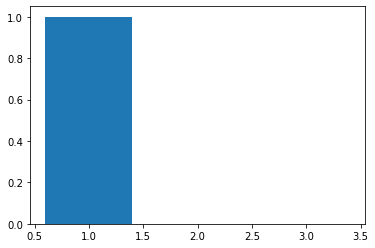

In [48]:
results_own.plot_hist()

In [49]:
#pca from skit learn
result = PCA().fit(X)
result.components_

array([[ 8.14908269e-05,  9.99999996e-01, -3.54004645e-05],
       [-4.91223375e-03,  3.58003395e-05,  9.99987934e-01],
       [ 9.99987932e-01, -8.13159483e-05,  4.91223664e-03]])

In [54]:
#Eigen values are the same
result.explained_variance_

array([2.21942286e+05, 1.23953003e+01, 4.46748649e+00])

## Comparison

In [56]:
index_names = ["Eigenvalues"]
for i in range(1,4):
    index_names.append("Eigenvectors {}".format(i))
compare_pca = pd.DataFrame({
    "Our own Implementation": [np.round(results_own.eigen_values,3),
                               np.round(results_own.eigen_vectors[0,:],5),
                               np.round(results_own.eigen_vectors[1,:],5),
                               np.round(results_own.eigen_vectors[2,:],5)],
    "Skit-learn": [np.round(result.explained_variance_,5),
                               np.round(result.components_[0,:],5),
                               np.round(result.components_[1,:],5),
                               np.round(result.components_[2,:],5)]},
    index=index_names)
compare_pca

,Our own Implementation,Skit-learn
Eigenvalues,"[221942.286, 12.395, 4.467]","[221942.2858, 12.3953, 4.46749]"
Eigenvectors 1,"[8e-05, 1.0, -4e-05]","[8e-05, 1.0, -4e-05]"
Eigenvectors 2,"[-0.00491, 4e-05, 0.99999]","[-0.00491, 4e-05, 0.99999]"
Eigenvectors 3,"[0.99999, -8e-05, 0.00491]","[0.99999, -8e-05, 0.00491]"


In [57]:
compare_pca.to_latex()

'\\begin{tabular}{lll}\n\\toprule\n{} &       Our own Implementation &                       Skit-learn \\\\\n\\midrule\nEigenvalues    &  [221942.286, 12.395, 4.467] &  [221942.2858, 12.3953, 4.46749] \\\\\nEigenvectors 1 &         [8e-05, 1.0, -4e-05] &             [8e-05, 1.0, -4e-05] \\\\\nEigenvectors 2 &   [-0.00491, 4e-05, 0.99999] &       [-0.00491, 4e-05, 0.99999] \\\\\nEigenvectors 3 &   [0.99999, -8e-05, 0.00491] &       [0.99999, -8e-05, 0.00491] \\\\\n\\bottomrule\n\\end{tabular}\n'

In [ ]:
#EXplained ratio also are same:
result.explained_variance_ratio_

In [166]:
results_own.explained_ratio

array([9.99924028e-01, 5.58449625e-05, 2.01275168e-05])